# Machine learning overview

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/insop/ML_crash_course/blob/main/1_ml_overview.ipynb)

## Outline

- Objectives
- Target audiences
- Machine learning: what and examples
- Types of machine learning systems
- A short example
- Tutorials: numpy, pandas
- Summary

***
Before discussing in-depth topics from the next notebook, this notebook aims to give a high level overview of machine learning.

We will discuss the objectives and audience of this ML crash notebook.
As part of the overview, it will be helpful to review the types of different machine learning systems.
Following that, we will take a quick look at an ML example we will cover next week.
We will review two of the most important Python libraries for ML, `numpy` and `pandas`, before finishing.
***

## Objectives
- discuss high level ML overview
- review representative ML systems
- able to identify potential areas that AI/ML could be helpful
- understand the development cycle of AI/ML applications
- understand the end-to-end view of AI/ML applications

***
This series of notebooks aims to provide a high-level overview of Machine Learning with practical examples. Reference materials will also be provided.

In addition, we want to help readers/audiences recognize the potential ML applications in the systems that they are working on either internally for themselves to improve the operation efficiency or externally for customers to provide awesome ML assisted features.

A final goal is to show ML development cycles together with MLOps and ML infrastructures, so that we can see the complete end-to-end view of ML applications, and not just the ML model training.
***

## Target audiences
- want to understand the high level view
    - read the notebook
- want to know how internals of ML system works
    - run the code in the notebook
- want to know
    - look at the material provided as references

***
To get the gist of machine learning, simply following along with this notebook is helpful. For those interested in learning how ML works, following along with the notebook and coding examples will be helpful. The reference material provided will be helpful for those who want to dig deeper.
***

## Machine learning: what and examples

### What is machine learning?

- a predictor $f$ takes some input $x$ and generates output $\hat{y}$
    - $x$ $\rightarrow$ $f$ $\rightarrow$ $\hat{y}$
- a predictor $f$ learns from training dataset
- to learn, prediction performance needs to be measured, such as prediction accuracy
- a predictor usually call ML model
- input can be structured or unstructured data

***
A subfield of artificial intelligence, machine learning includes statistical machine learning and artificial neural networks.

Next, we will introduce three ML task areas: classification, regression, and other types of prediction.
***

#### Classification task

- a binary classification predicts positive or negative output
    - $x$ $\rightarrow$ $f$ $\rightarrow$ $0$ or $1$
- examples of binary classfication
    - spam detection, is spam or not?
    - tagging offensive comments on discussion forums
- $k$ multiclass classification predicts one of $k$ classes
    - $x$ $\rightarrow$ $f$ $\rightarrow$ $0, 1, ..., (k-1)$
- examples of multiclass classfication
    - image classification
    - digit classification

***
Binary classification is also known as logistic regression, please do not confuse it with the following regression task. For supervised training, each dataset consists of input and output labels. We will discuss supervised machine learning in short.
***

#### Regression task
- prediction output is real number, $\hat{y} \in \mathbb{R}$
- examples
    - housing price prediction given many features of the house
    - forcasting cmopany's revenue next year based on performance metrics


***
It is also known as linear regression, which has a long history dated back to Gauss and Legendre in 1809.
***

#### Other types of prediction tasks
- any other types of model predicts complex objects
- task could often decomposed or cascade with one or more classification and regression tasks
- examples:
    - object detection: predicts object types and locations
    - language translatoin: given input language and translate to other language

***
The other types of tasks may seem overwhelming, but they are built using simpler regression and classification tasks.
***

## Types of machine learning systems
- Supervised learning
    - training data is give with label (ground truth)
    - regression, classification
- Unsupervised learning
    - training data is unlabled, 
    - clustering, anomaly detection
- Reinforcement learning
    - learn by trying and learn from sequential try and error information
    - popularized as winning games, but there are many potentials in real world applications

## Short ML example

We will see a simple ML example that predict $y$ value give $x$ value, which is regression type of ML. The following [code](https://github.com/ageron/handson-ml2/blob/3cffb49fffb4d79db5e68de1fc5f91d5e74262e8/01_the_machine_learning_landscape.ipynb) is from book [1].

In this example, life satisfaction is predicted based on GDP per capita. Please don't worry if you don't understand the details; we will discuss these issues in our next notebook.

***
Import python modules, [sklearn](https://scikit-learn.org/stable) provide many of the widely used ML models.

In [1]:
import sklearn
import sys

import matplotlib.pyplot as plt # graph
import numpy as np # number handling
import pandas as pd # structured data handling
import sklearn.linear_model
import os

# enable this when running locally
# from utils import save_fig

A helper function to prepare dataset using OECD's life satisfaction values and the IMF's GDP per capita.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# prepare download path
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# Download the training dataset
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [6]:
# load training data and prepare input dataset

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

Here is the scatter plot of the training dataset, $x$ is GDP per capita, and $y$ (label) is life satisfaction.

Our goal is to find a linear line that fits to the data.

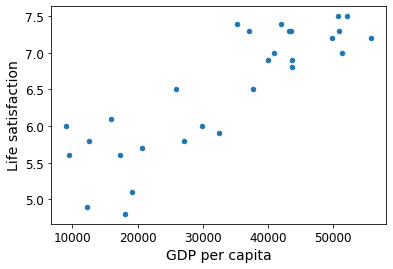

In [7]:
# Visualize the training dataset
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

The follosing two lines of code trains the ML model (linear regression)

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
reg = model.fit(X, y)

We can check this linear equation
$y = \theta_0 x + \theta_1$, 

where $x$ is "GDP per capita", $y$ is "Life satisfaction"

In [9]:
𝜃1 = reg.coef_[0][0]
𝜃0 = reg.intercept_[0]
print(f"y = {𝜃1:.6f}x + {𝜃0:.2f}")

y = 0.000049x + 4.85


***
Now we can plot the linear equation on top of the training dataset.

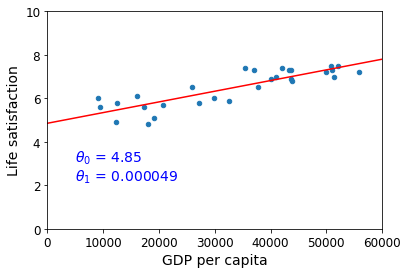

In [10]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 𝜃0 + 𝜃1*X, "r")
plt.text(5000, 3.1, r"$\theta_0$ = {:.2f}".format(𝜃0), fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1$ = {:.6f}".format(𝜃1), fontsize=14, color="b")
plt.show()

***
Now we can make prediction for Cyprus.

In [11]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print("Cyprus's GDP per capita {}".format(cyprus_gdp_per_capita))


Cyprus's GDP per capita 22587.49


In [12]:
# Make a prediction for Cyprus

cyprus_predicted_life_satisfaction = model.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

print("Life satisfaction of Cyprus is: {}".format(cyprus_predicted_life_satisfaction))

Life satisfaction of Cyprus is: 5.962447443188149


***
We can plot our prediction overlay with the linear equation and training data.

Saving figure cyprus_prediction_plot


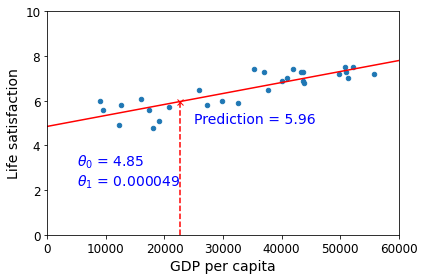

In [13]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 𝜃0 + 𝜃1*X, "r")
plt.text(5000, 3.1, r"$\theta_0$ = {:.2f}".format(𝜃0), fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1$ = {:.6f}".format(𝜃1), fontsize=14, color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = {:.2f}".format(cyprus_predicted_life_satisfaction), fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "rx")

# enable it when it locally
# save_fig('cyprus_prediction_plot')

plt.show()

## SW tools
 - Numpy: efficient vectory, matrix handling library
     - [Numpy tutorial](https://github.com/insop/ML_crash_course/blob/main/tutorial_numpy.ipynb)
 - Pandas: structured data handling
     - [Pandas tutorial](https://github.com/insop/ML_crash_course/blob/main/tutorial_pandas.ipynb)


***
`numpy` is the main library used in machine learning and data science, since it handles vectors and matrices efficiently. Other deep learning frameworks (such as TensorFlow or PyTorch) that we will discuss later uses `numpy` style vector representations, so knowing `numpy` is essential to ML programming.

Data that can be represented as rows and columns are handled by `pandas`, such as csv files.
***

## Summary:
- short and high level review of ML
    - regression, classification tasks
- types of ML:
    - supervised, unsupervised, RL
- short example
- numpy and pandas tutorial

## Credits

This notebook uses the contents from the followring materials:

1. Chapter 1 from Book [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. Code example [01_the_machine_learning_landscape](https://github.com/ageron/handson-ml2/blob/3cffb49fffb4d79db5e68de1fc5f91d5e74262e8/01_the_machine_learning_landscape.ipynb)
3. [ML overview](https://stanford-cs221.github.io/autumn2021-extra/modules/machine-learning/overview.pdf)